## 技术方案
- 美股: 将xml/html等文件直接保存成pdf文件: [Python使用wkhtmltopdf进行html转pdf](https://blog.csdn.net/qq_39101581/article/details/129707958)
    - pip安装pdfkit，然后[mac下brew安装wkhtmltopdf](https://github.com/JazzCore/python-pdfkit)
- 港股: 直接是pdf文件

- 美股公告文件
    - xml/html后缀的网址
        - 直接通过requests.get或langchain的AsyncHtmlLoader都无法获取到文件真实内容，被网站的反爬虫发现
            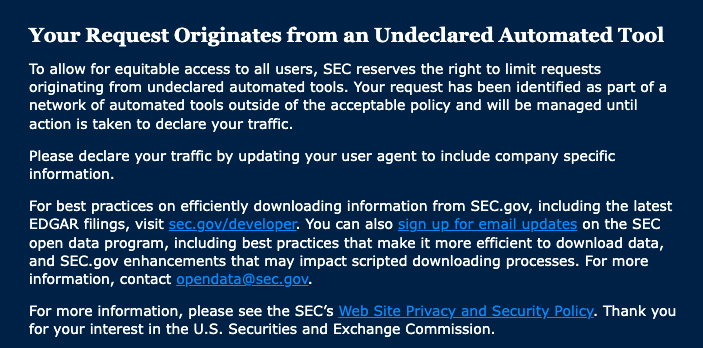
        - 通过SEC的数据接口获取到html文件，存储到本地，再通过langchain的

In [6]:
import os
import sys
import pdfkit
import requests
project_dir = "/Users/jarvixwang/Documents/Project/gpt-researcher"
sys.path.append(project_dir)
import utils
# output_dir = os.path.join(project_dir, "notebook/results/use_youtube_transcript_prompt/")
output_dir = os.path.join(project_dir, "raw_data")
os.makedirs(output_dir, exist_ok=True)
# pdfkit.from_url(url='https://www.sec.gov/Archives/edgar/data/1318605/000195004723003734/xsl144X01/primary_doc.xml', 
#                 output_path=os.path.join(output_dir, 'out.pdf'))

In [19]:
# download_html(**url_data, save_path=os.path.join(dataset_dir, "small_set/download.html"))
# https://www.sec.gov/Archives/edgar/data/1754581/000110465923061118/tm2315930d1_ex99-1.htm
url1 = "https://www.sec.gov/Archives/edgar/data/1318605/000195004723003734/xsl144X01/primary_doc.xml"
url_q = "https://www.sec.gov/Archives/edgar/data/1045810/000104581023000175/nvda-20230730.htm"
url_6k_main = "https://www.sec.gov/Archives/edgar/data/1754581/000110465923061118/tm2315930d1_6k.htm"
url_6k_detail = "https://www.sec.gov/Archives/edgar/data/1754581/000110465923061118/tm2315930d1_ex99-1.htm"
url_pdd_20f = "https://www.sec.gov/Archives/edgar/data/1737806/000110465923049927/pdd-20221231x20f.htm"

utils.sec_htm_to_file(url=url_pdd_20f, 
                      save_filepath=os.path.join(output_dir, "pdd_20f_10files.html")
                      )

从SEC url=https://www.sec.gov/Archives/edgar/data/1737806/000110465923049927/pdd-20221231x20f.htm:
解析到url_data={'cik': '1737806', 'accession_no': '000110465923049927', 'filename': 'pdd-20221231x20f'}
拼接url_data得到url: https://archive.sec-api.io/1737806/000110465923049927/pdd-20221231x20f.htm?token=01c9ecf0d0e82f4c0c284cf56761fad0ecade92f6ec63a3e13a828dbfc6a96d4
成功保存SEC url文件到本地: /Users/jarvixwang/Documents/Project/gpt-researcher/raw_data/pdd_20f_10files.html


In [18]:
# from langchain.document_loaders import AsyncHtmlLoader
from langchain.document_loaders import (
    UnstructuredHTMLLoader, 
    UnstructuredXMLLoader, 
    UnstructuredFileLoader
)
# urls = ["https://www.sec.gov/Archives/edgar/data/1318605/000195004723003734/xsl144X01/primary_doc.xml"]
loader = UnstructuredFileLoader(os.path.join(output_dir, "demo.pdf"))#AsyncHtmlLoader(urls)

docs = loader.load()
print(docs[0].page_content)
# with open(os.path.join(output_dir, "primary_doc.xml"), "w") as f:
#     f.write(docs[0].page_content)

EX-99.1 2 tm2310734d1_ex99-1.htm EXHIBIT 99.1

Exhibit 99.1

Alibaba Group Announces New Organizational and Governance Structure

Alibaba Group Holding Limited (NYSE: BABA and HKEX: 9988, “Alibaba Group” or “we”) announces a new organizational and governance structure to empower all our businesses to become more agile, enhance decision making, enable faster responses to market changes, and promote innovation to capture opportunities in their respective markets and industries, thereby unlocking the value of Alibaba Group’s various businesses.

Under this plan, we will have six major business groups and other investments, each to be independently managed by its own chief executive officer and board of directors. The six major business groups that we plan to establish are:

1. Cloud Intelligence Group (including cloud, AI, DingTalk and other businesses), with Daniel Zhang serving as chief executive officer in addition to his responsibilities as Alibaba Group’s chairman and chief executive

## [insider trader API Doc](https://sec-api.io/docs/insider-ownership-trading-api)
- "https://api.sec-api.io/insider-trading"
- Insider trades are reported to the SEC in `form 3, 4 and 5`.


In [4]:
url_form4 = "https://www.sec.gov/Archives/edgar/data/1318605/000177134023000008/xslF345X05/edgardoc.xml"
utils.InsiderTradingDataAPI.dump_text_by_filing_url(url_form4, form_type="4", save_filepath=os.path.join(output_dir, "form4.txt"))

{'query': {'query_string': {'query': 'cik:"1318605" AND accessionNo: "0001771340-23-000008" AND formType:"4"'}}, 'from': '0', 'size': '20', 'sort': [{'filedAt': {'order': 'desc'}}]}
{'total': {'value': 1, 'relation': 'eq'}, 'query': {'from': 0, 'size': 20}, 'filings': [{'id': 'fa20f62aa589888dacea5a6e7ddad386', 'accessionNo': '0001771340-23-000008', 'cik': '1318605', 'ticker': 'TSLA', 'companyName': 'Tesla, Inc.', 'companyNameLong': 'Tesla, Inc. (Issuer)', 'formType': '4', 'description': 'Form 4 - Statement of changes in beneficial ownership of securities', 'filedAt': '2023-09-07T19:39:15-04:00', 'linkToTxt': 'https://www.sec.gov/Archives/edgar/data/1318605/000177134023000008/0001771340-23-000008.txt', 'linkToHtml': 'https://www.sec.gov/Archives/edgar/data/1318605/000177134023000008/0001771340-23-000008-index.htm', 'linkToXbrl': '', 'linkToFilingDetails': 'https://www.sec.gov/Archives/edgar/data/1318605/000177134023000008/xslF345X05/edgardoc.xml', 'entities': [{'companyName': 'Tesla, I

### 直接用sec-api将难以处理的[form 4的xxx.xml文件转成pdf](https://sec-api.io/docs/sec-filings-render-api#:~:text=Generating%20a%20PDF%20of%20an%20SEC%20form%204%20XML%20filing%3A)
```
https://api.sec-api.io/filing-reader?
token=YOUR_API_KEY&
type=pdf&
url=https://www.sec.gov/Archives/edgar/data/1833764/000089924321006812/xslF345X02/doc3.xml
```

In [22]:
def xml_or_htm_url_to_pdf_file(url, save_filepath):
    url = f"https://api.sec-api.io/filing-reader?token={utils.EXTRACTOR_API_KEY}&type=pdf&url={url}"
    headers = {"Content-Type": "application/pdf"}
    rsp = requests.get(url, headers=headers)
    #print(rsp.content)
    with open(save_filepath, "wb") as f:
        f.write(rsp.content)

url = "https://www.sec.gov/Archives/edgar/data/1754581/000110465923061118/tm2315930d1_ex99-1.htm"
url = "https://www.sec.gov/Archives/edgar/data/1577552/000110465923037408/tm2310734d1_6k.htm"
url = "https://www.sec.gov/Archives/edgar/data/1577552/000110465923037408/tm2310734d1_ex99-1.htm"
sg_url = "https://links.sgx.com/1.0.0/corporate-announcements/UZ47PX7O14U1105I/302262__OCPHK_Form3_23Jun2014_Final.pdf"
hk_url = "https://newsfile.futunn.com/notice/2022/03/31/10189795-0.PDF?_ftsdk=1578534612836705"
xml_or_htm_url_to_pdf_file(url,#"https://www.sec.gov/Archives/edgar/data/1318605/000177134023000008/xslF345X05/edgardoc.xml",
                    save_filepath=os.path.join(output_dir, "hk.pdf")
                    )
    

In [24]:
rsp = requests.get(hk_url,
                   headers={"Content-Type": "application/pdf"})
with open(os.path.join(output_dir, 'hk2.pdf'), 'wb') as f:
    f.write(rsp.content)